# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [ ]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [ ]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

### Understanding the structure of the data

In [ ]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Write your code here to read the data
data = pd.read_csv('/content/drive/MyDrive/foodhub_order.csv')

In [ ]:
# Write your code here to view the first 5 rows
data.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [ ]:
# Write your code here
data.shape

(1898, 9)

#### Observations:
There are 9 columns and 1898 rows.


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [ ]:
# Write your code here
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations:
The datatypes of the different columns in the dataset are int64, float64, and object.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [ ]:
# Write your code here
data.isnull().sum()

order_id                 0
customer_id              0
restaurant_name          0
cuisine_type             0
cost_of_the_order        0
day_of_the_week          0
rating                   0
food_preparation_time    0
delivery_time            0
dtype: int64

#### Observations:
There are no missing values in the data.

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [ ]:
# Write your code here
data.describe()

,order_id,customer_id,cost_of_the_order,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,35.000000,33.000000


#### Observations:
For food to be prepared once an order is placed, minimum time is 20 minutes, average time is 27.37 minutes, and maximum time is 35 minutes.

### **Question 5:** How many orders are not rated? [1 mark]

In [ ]:
# Write the code here
data[data['rating']=='Not given'].count()

order_id                 736
customer_id              736
restaurant_name          736
cuisine_type             736
cost_of_the_order        736
day_of_the_week          736
rating                   736
food_preparation_time    736
delivery_time            736
dtype: int64

#### Observations:
There are 736 orders that aren't rated.

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

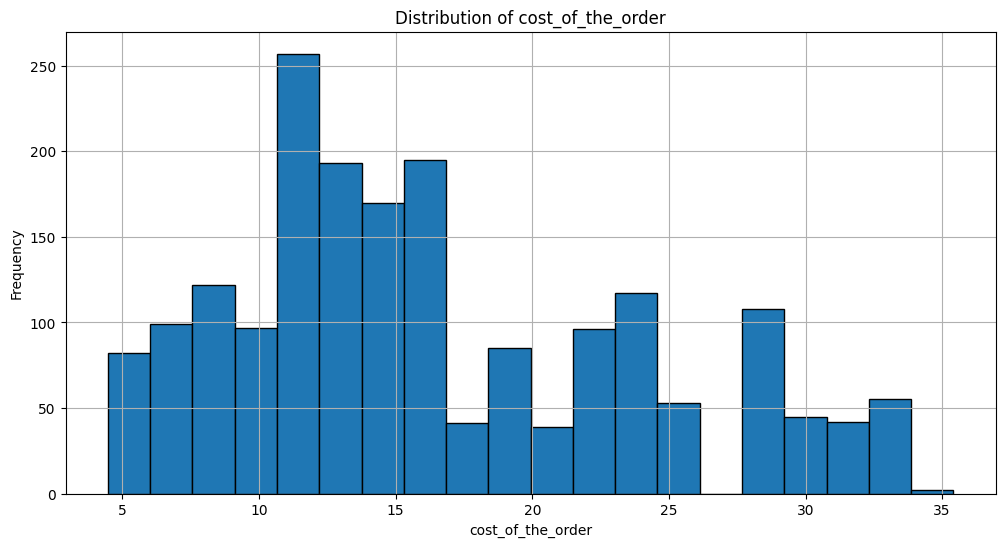

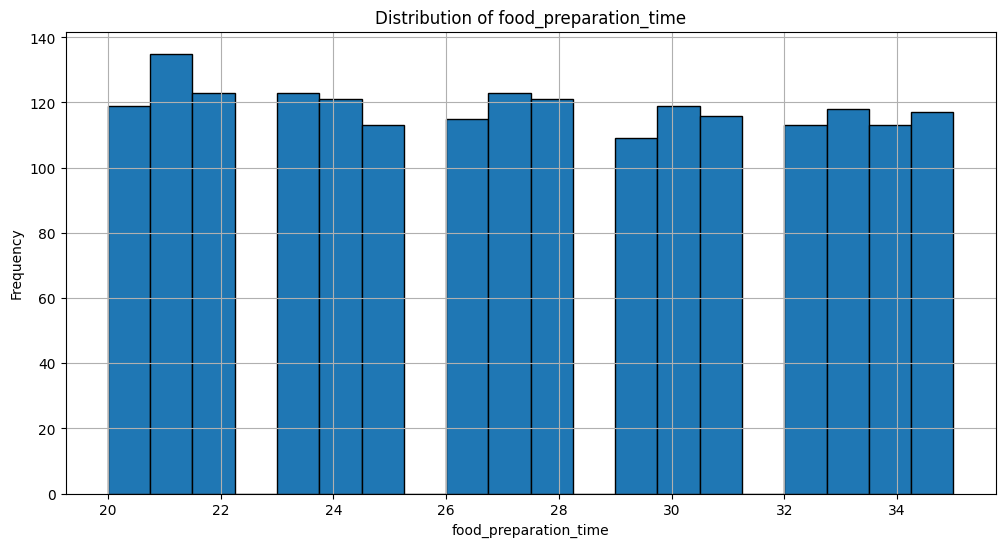

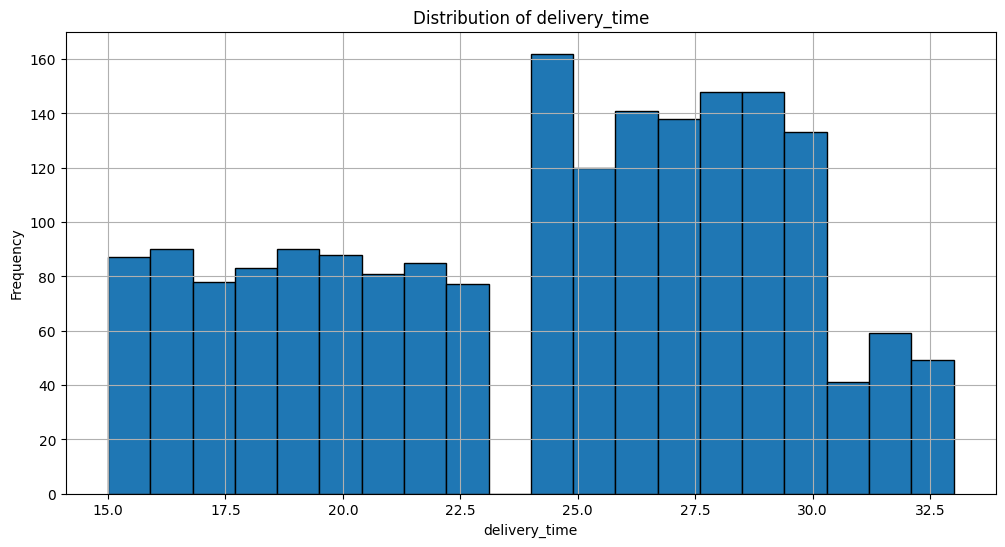

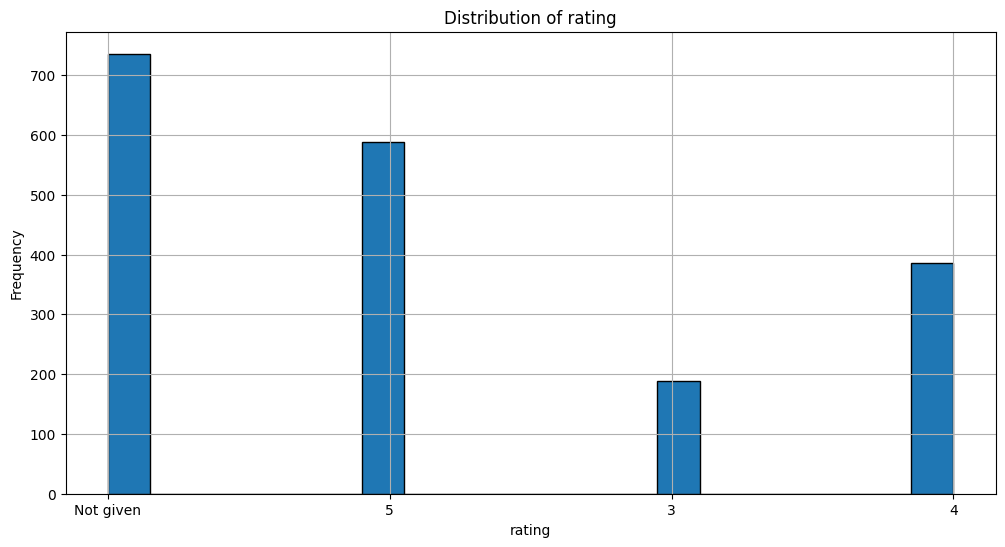

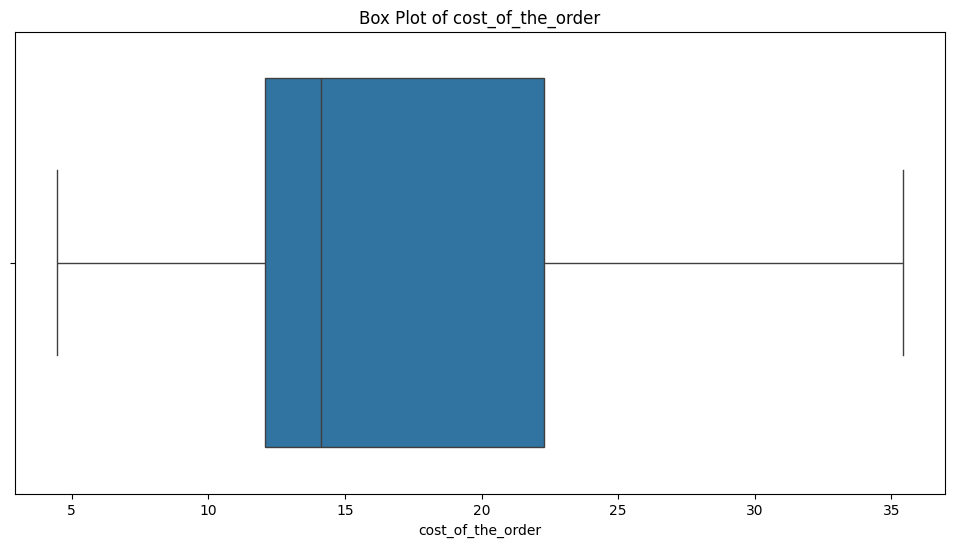

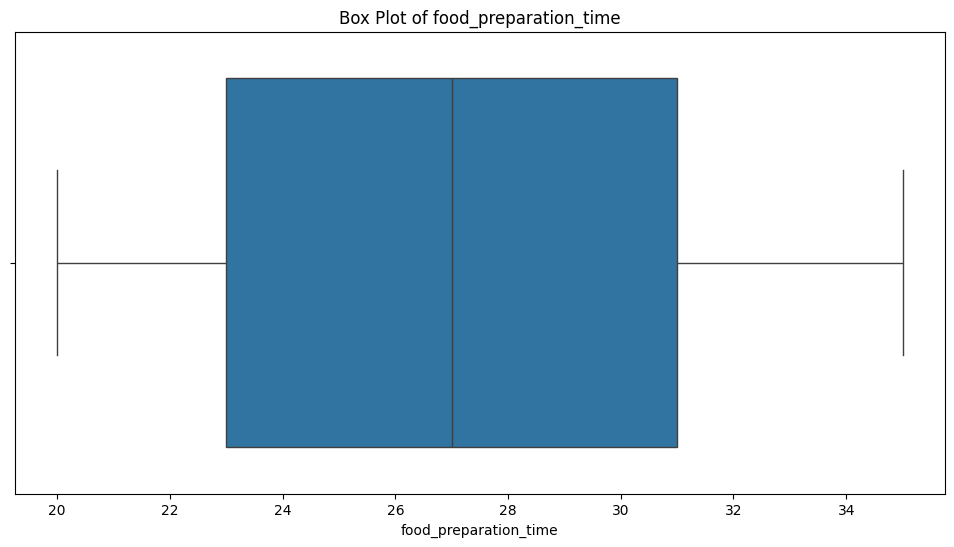

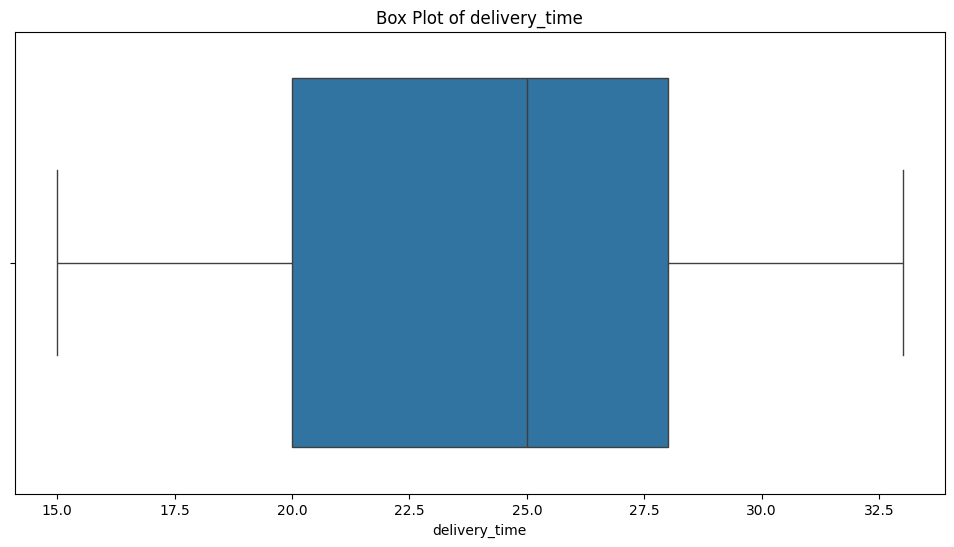

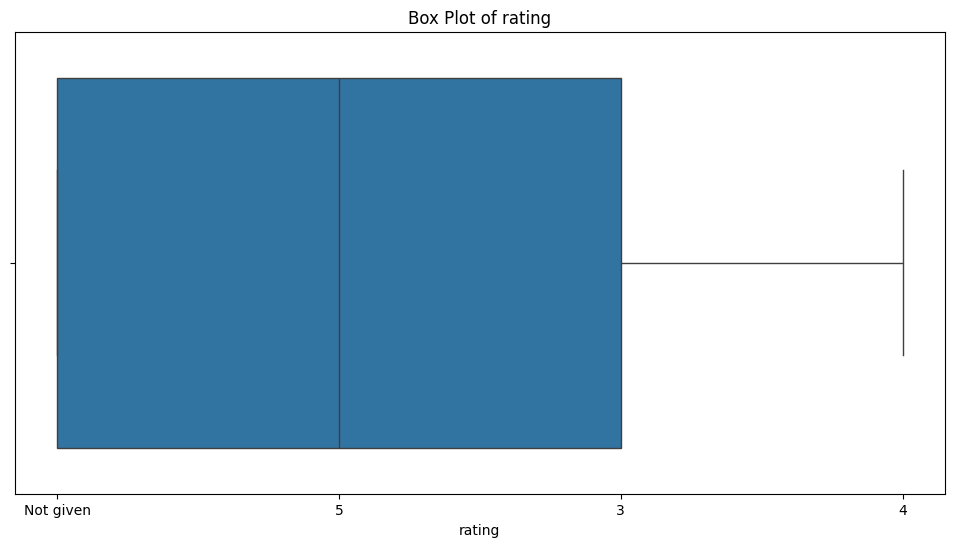

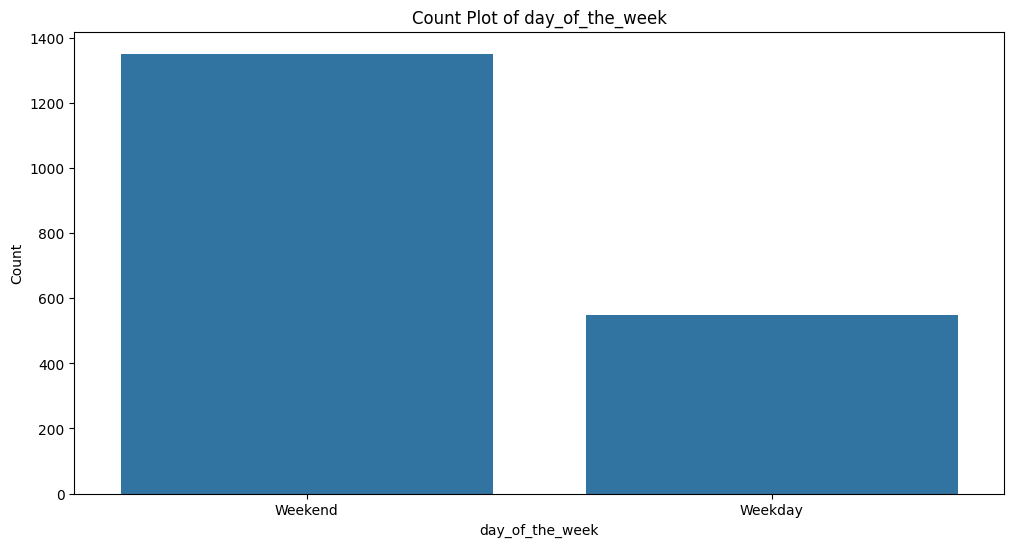

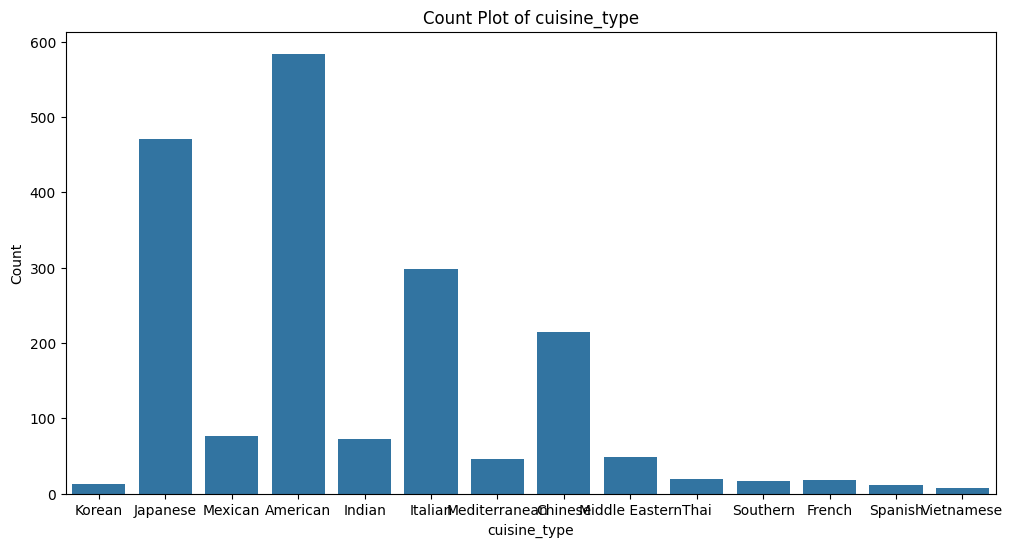

In [ ]:
# Write the code here
numerical_vars = ['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']
for var in numerical_vars:
    plt.figure(figsize=(12, 6))
    data[var].hist(bins=20, edgecolor='black')
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.show()

#box plots for numerical variables
for var in numerical_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data[var])
    plt.title(f'Box Plot of {var}')
    plt.xlabel(var)
    plt.show()

#count plots for categorical variables
categorical_vars = ['day_of_the_week', 'cuisine_type']
for var in categorical_vars:
    plt.figure(figsize=(12, 6))
    sns.countplot(x=var, data=data)
    plt.title(f'Count Plot of {var}')
    plt.xlabel(var)
    plt.ylabel('Count')
    plt.show()

#### Observations:

Observations are that:

*   American is the most popular cuisine, and Vietnamese the least popular
*   Most orders are on the weekends
*   The median rating is 5
*   The median delivery time is 25 minutes, with the max being over 32.5 minutes, and the minimum being around 15 minutes
*   The median food preparation time is 27 minutes, with the max being over 24 minutes, and the min being around 20 minutes
*   The median cost of order is a little less than 15 dollars, with the max cost of order being over 35 dollars, and the minumum being less than 5 dollars
*   More than 700 orders haven't been rated












### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [ ]:
# Write the code here
data['restaurant_name'].value_counts().head(5)

restaurant_name
Shake Shack                  219
The Meatball Shop            132
Blue Ribbon Sushi            119
Blue Ribbon Fried Chicken     96
Parm                          68
Name: count, dtype: int64

#### Observations:
The top 5 restaurants in terms of the number of orders received are, in order:
Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and Parm.

### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [ ]:
# Write the code here
data[data['day_of_the_week'] == 'Weekend']['cuisine_type'].value_counts().head(1)

cuisine_type
American    415
Name: count, dtype: int64

#### Observations:
The most popular cuisine on weekends is American.

### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [ ]:
# Write the code here
(data[data['cost_of_the_order'] > 20].shape[0] / data.shape[0]) * 100

29.24130663856691

#### Observations:
Around 29.24% of the orders cost more than 20 dollars.

### **Question 10**: What is the mean order delivery time? [1 mark]

In [ ]:
# Write the code here
data['delivery_time'].mean()

24.161749209694417

#### Observations:
The mean order delivery time is around 24.16 minutes.

### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [ ]:
# Write the code here
data['customer_id'].value_counts().head(3)

customer_id
52832    13
47440    10
83287     9
Name: count, dtype: int64

#### Observations:
The IDs and number of orders placed for the top 3 most frequent customers are, in order:

Customer ID: **52832 with 13** orders placed,
Customer ID: **47440 with 10** orders placed,
Customer ID: **83287 with 9** orders placed

### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


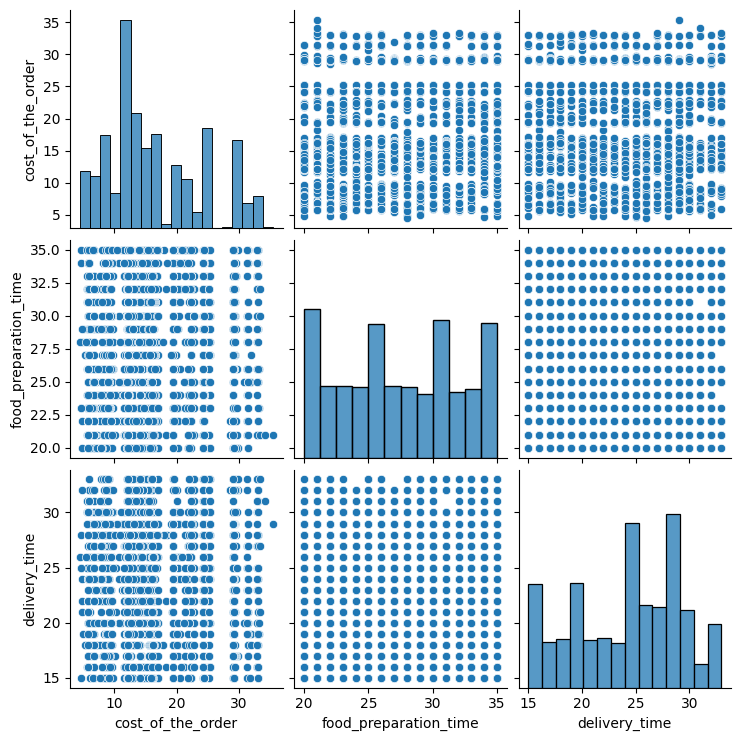

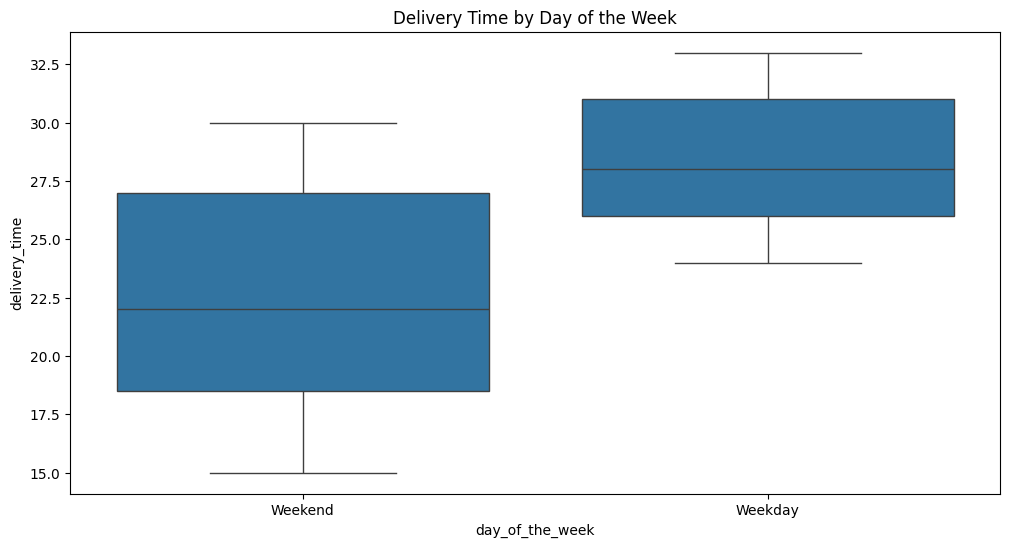

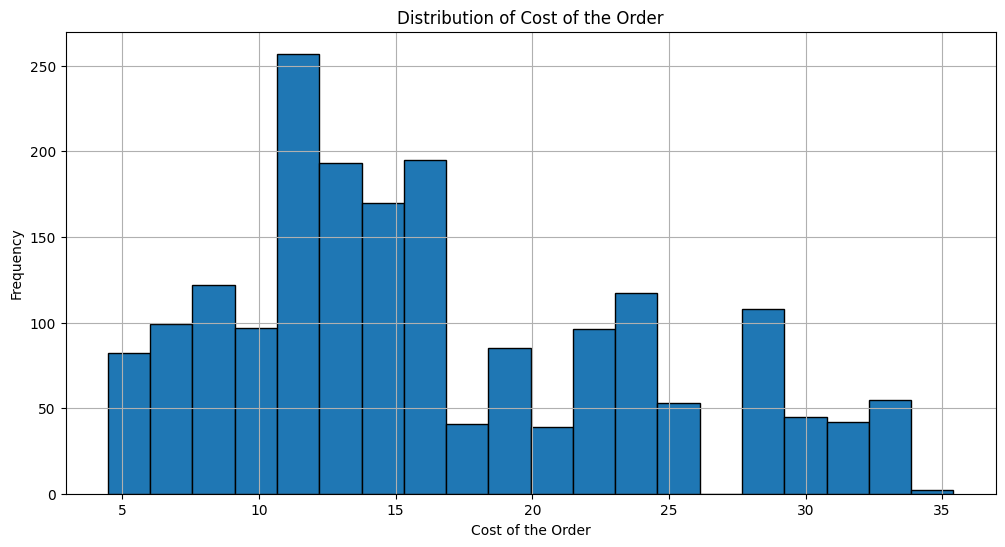

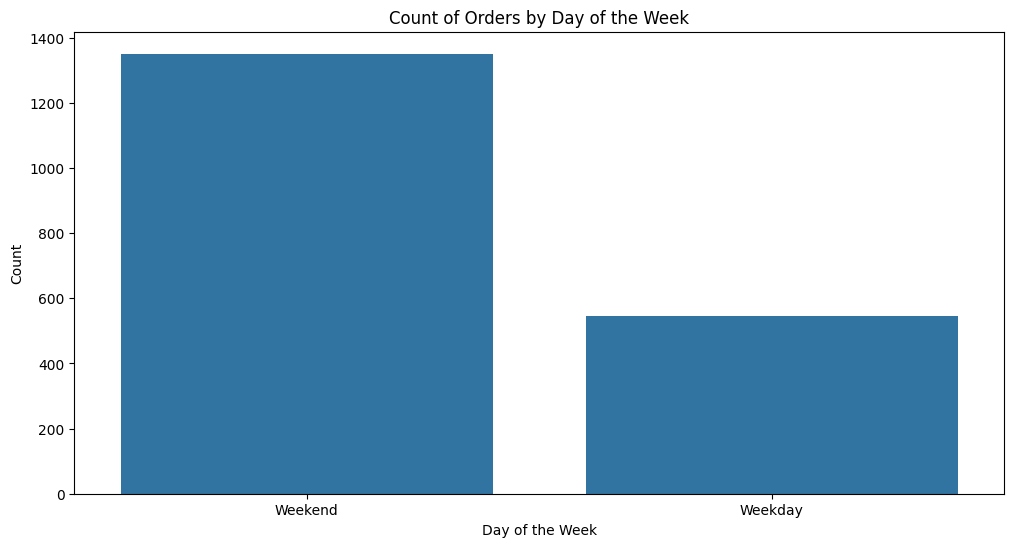

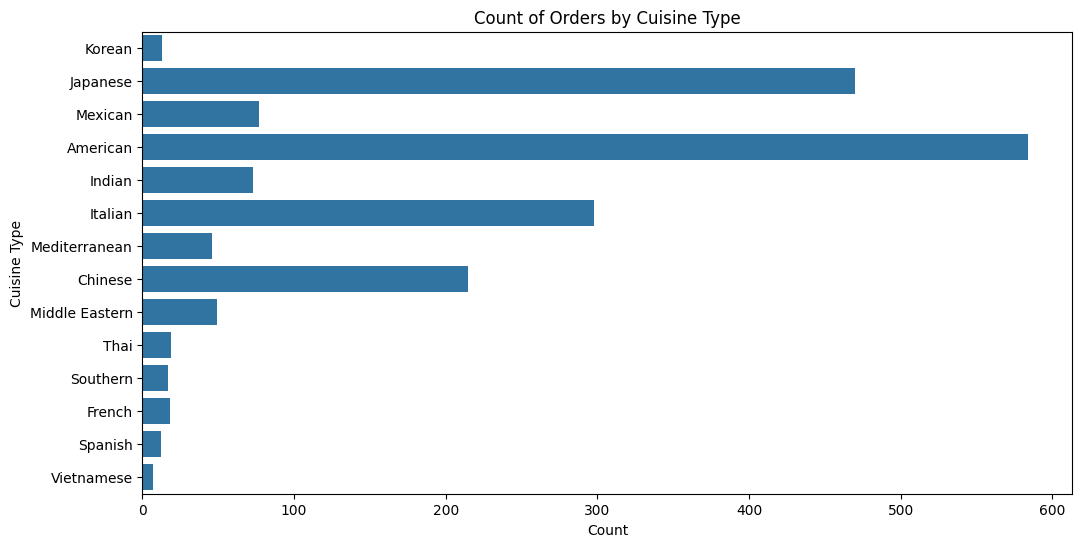

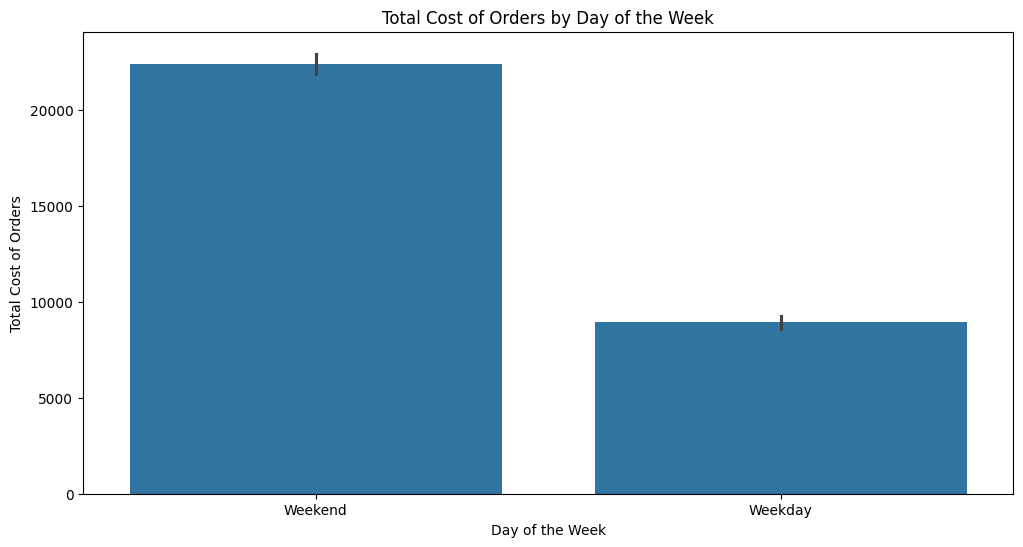

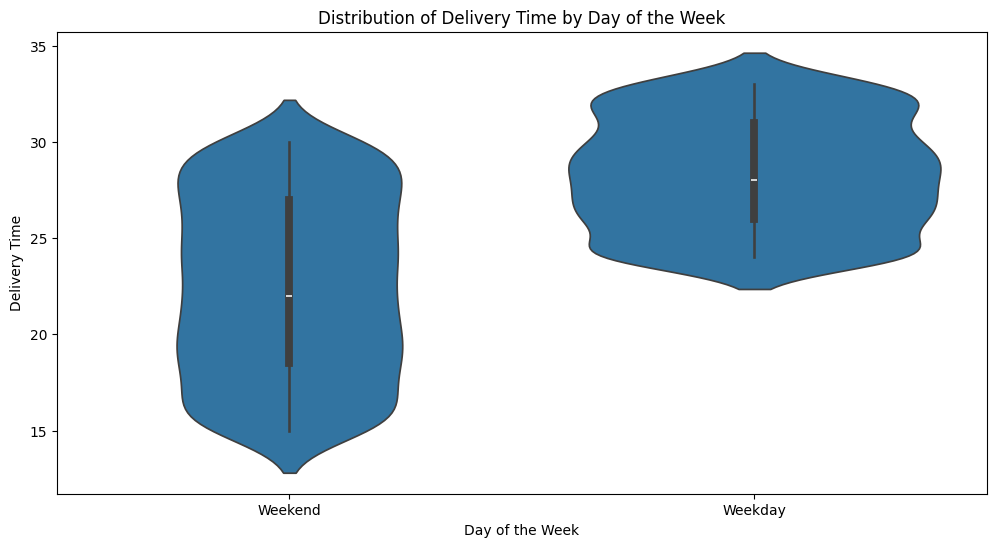

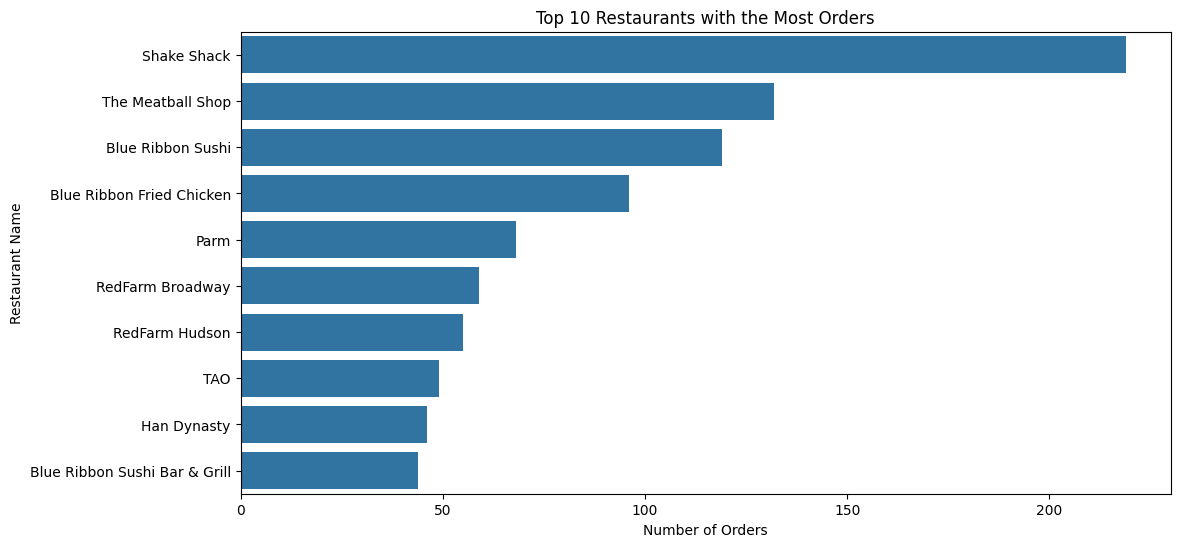

In [ ]:
# Write the code here
#pair Plot
sns.pairplot(data[['cost_of_the_order', 'food_preparation_time', 'delivery_time', 'rating']])
plt.show()

#box Plots
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_the_week', y='delivery_time', data=data)
plt.title('Delivery Time by Day of the Week')
plt.show()

#histograms for numerical variables
plt.figure(figsize=(12, 6))
data['cost_of_the_order'].hist(bins=20, edgecolor='black')
plt.title('Distribution of Cost of the Order')
plt.xlabel('Cost of the Order')
plt.ylabel('Frequency')
plt.show()


#count plots for categorical variables
plt.figure(figsize=(12, 6))
sns.countplot(x='day_of_the_week', data=data)
plt.title('Count of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(y='cuisine_type', data=data)
plt.title('Count of Orders by Cuisine Type')
plt.xlabel('Count')
plt.ylabel('Cuisine Type')
plt.show()

#bar plots
plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_the_week', y='cost_of_the_order', data=data, estimator=sum)
plt.title('Total Cost of Orders by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Cost of Orders')
plt.show()

#violin plots
plt.figure(figsize=(12, 6))
sns.violinplot(x='day_of_the_week', y='delivery_time', data=data)
plt.title('Distribution of Delivery Time by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Delivery Time')
plt.show()


plt.figure(figsize=(12, 6))
sns.barplot(x=data['restaurant_name'].value_counts().head(10).values, y=data['restaurant_name'].value_counts().head(10).index)
plt.title('Top 10 Restaurants with the Most Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Restaurant Name')
plt.show()


#### Observations:

General obvervations from the plots are that delivery times on the weekday are usually greater than times on the weekend, total cost of orders and total orders are much greater on weekends than on weekdays, the 3 most popular cuisines are American, Japanese, and Italian, the most frequent cost of an order is between 10 and 15 dollars, and Shake Shack has the most orders.


### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [ ]:
# Write the code here
import warnings
warnings.filterwarnings('ignore')
copy = data[data['rating'] != 'Not given']
copy['rating'] = pd.to_numeric(copy['rating'])
filtered = copy.groupby('restaurant_name').filter(lambda x: x['rating'].mean() > 4 and x['rating'].count() > 50)
filtered.nunique()
filtered
#since filtered.nunique == 4, there are 4 individual restaurants in the filtered data. After printing filtered, I can see 4 different restaurant names,
# so these must be the restaurants that fulfill the criteria



,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,time_required
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,40
12,1476966,129969,Blue Ribbon Fried Chicken,American,24.30,Weekend,5,23,17,40
15,1477414,66222,Shake Shack,American,16.20,Weekend,5,33,25,58
19,1477354,67487,Blue Ribbon Sushi,Japanese,16.20,Weekend,4,35,26,61
22,1478287,150599,Shake Shack,American,29.10,Weekday,5,21,30,51
...,...,...,...,...,...,...,...,...,...,...
1880,1477466,222734,Shake Shack,American,13.97,Weekend,5,35,27,62
1884,1477437,304993,Shake Shack,American,31.43,Weekend,3,31,24,55
1885,1477550,97324,Shake Shack,American,29.05,Weekday,4,27,29,56
1886,1478277,48282,The Meatball Shop,American,14.50,Weekend,5,34,25,59


#### Observations:
The 4 restaurants that fulfill the criteria to receive the promotional offer are:

**Shake Shack, Blue Ribbon Sushi, The Meatball Shop, and Blue Ribbon Fried Chicken.**

### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [ ]:
# Write the code here

#get orders with cost greater than 20, and multiply by .25 to get the revenue
revenue_greater_than_20 = data[data['cost_of_the_order'] > 20]['cost_of_the_order'] * 0.25
#sum up the values
rev_greater_than_20 = revenue_greater_than_20.sum()

#do the same for orders greater than 5, but don't include orders greater than 20, sicne we don't want to double count
revenue_greater_than_5 = data[(data['cost_of_the_order'] > 5) & (data['cost_of_the_order'] <=20)]['cost_of_the_order'] * 0.15
rev_greater_than_5 = revenue_greater_than_5.sum()

rev_greater_than_20 + rev_greater_than_5

6166.303

#### Observations:
The net revenue generated is **$6,166.30.**

### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [ ]:
# Write the code here
data['time_required'] = data['food_preparation_time'] + data['delivery_time']
(data[data['time_required'] > 60].shape[0] / data.shape[0]) * 100

10.537407797681771

#### Observations:
About **10.54%** of orders take more than 60 minutes to get delivered from the time order is placed.

### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [ ]:
# Write the code here
mean_delivery_time_weekdays = data[data['day_of_the_week'] == 'Weekday']['delivery_time'].mean()
mean_delivery_time_weekends = data[data['day_of_the_week'] == 'Weekend']['delivery_time'].mean()
mean_delivery_time_weekdays, mean_delivery_time_weekends

(28.340036563071298, 22.4700222057735)

#### Observations:
The mean delivery time on weekdays is around **28 minutes**, which is around 6 minutes greater than the mean delivery time on weekends, which is around **22 minutes**.

### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  Top three most popular cuisines are American, Japanese, and Italian.

*  Shake Shack has the most orders.

*  Most orders happen during the weekends.

*  The delivery time on weekends is also less than on weekdays.

*  The most frequent cost of an order (the mode) is between 10 and 15 dollars.

*   Of 1898 orders, 736 haven't been rated

*   The average delivery time is around 27 minutes







### Recommendations:

*  Since the most popular cuisines are American, Japanese, and Italian, so FoodHub should focus on acquiring restaurants in these areas as customers, since they will provide the most volume of customers to use the app.

*   Since Shake Shack has the most orders, FoodHub should try to make this restaurant their main target customer, and integrate with them as soon as possible, as they have the most order volume, and thus the most potential users for FoodHub's app.

*   Since most orders are on the weekends, FoodHub should make sure to always have a large enough network of delivery people to handle the delivery of all these orders.

*   Since 38.7% of orders haven't been rated, FoodHub can implement some sort of feature/incentive pushing customers to rate the orders, which will help restaurants greatly, further strengthening FoodHub's app and FoodHub's relationship with the restaurants it works with.

*   The median delivery time on weekdays is over 27.5 minutes, much more than the median delivery time on weekends. FoodHub should try to find a way to decrease these delivery times as much as possible (through rewards for drivers, providing optimal travel routes, etc.) to improve customer satisfaction.





---